# Fundamentals of Computer Vision

This Jupyter Notebook covers **Project 2** of the course and focuses on implementing Non-Linear Filtering and Morphological Operations to introduce fundamental concepts in image processing. Each section has questions that must be answered in a Document in PDF format.

**Important**

Both the Non-Linear Filtering and Morphological Operations tasks (Code + Answers) must be submitted; otherwise, your work will be rejected.


## Grading Breakdown: ##
- Non-Linear Filtering: 40 points (Code: 24 pts, Answers: 16 pts).
- Morphological Operations: 45 points (Code: 27 pts, Answers: 18 pts).
- (OPTIONAL) Watermarking: 15 points (Code: 9 pts, Answers: 6 pts).

To pass Project 2, a minimum of **50 points** is required.

# **Non-Linear Filtering**

## **Median Filter**

In this exercise, you will implement a median filter, a non-linear filter that reduces noise in an input image by replacing each pixel with the median value of its surrounding neighborhood. Follow these steps to complete the implementation of the `median_filter()` function:

1. Define the filter size.

2. Add padding to the input image (if padding > 0).

3. Initialize an output matrix based on image size, kernel size, padding and stride.

4. Extract the region for each pixel.

5. Find the median of the region.

6. Set the median value for the corresponding pixel in the output matrix.

7. Return the filtered image.

C:\Users\Eric\AppData\Local\Temp\ipykernel_13096\2241675000.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


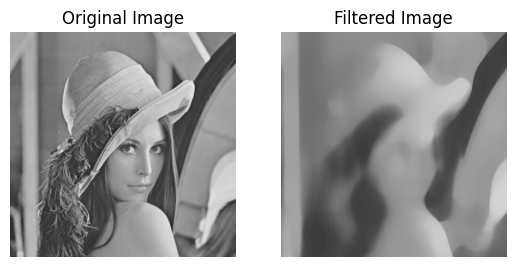

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread("./images/lenna.png", 0)

# Set a kernel
kernel_size = 50

# Set needed variables
padding = 1
stride = 1

def median_filter(image, kernel_size, padding=0, stride=1):
    # Your code goes here!
    y, x = image.shape[0], image.shape[1]
    rows = int((y - kernel_size + 2*padding) / stride + 1)
    cols = int((x - kernel_size + 2*padding) / stride + 1)
    
    padded_image = np.pad(image, padding)

    filtered_image = np.zeros((rows, cols))

    for j in range(rows):
        j_start = j * stride
        j_end = j_start + kernel_size
        for i in range(cols):
            i_start= i * stride
            i_end = i_start + kernel_size

            filtered_image[j, i] = np.median(padded_image[j_start:j_end, i_start:i_end])

    return filtered_image


# Apply your median filter
filtered_image = median_filter(image, kernel_size)

# Display the image and filtered_image
# Your code to display the images goes here!
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(filtered_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered Image")
ax[1].axis("off")

fig.show()

After implementing your median filter, test it with different kernel sizes on a noisy image, which can be generated using the provided `salt_pepper()` function.

In [2]:
def salt_pepper(image, salt_prob, pepper_prob):
    """
    Add salt and pepper noise to an image.

    :param image: Input image (NumPy array).
    :param salt_prob: Probability of adding salt noise (white pixels).
    :param pepper_prob: Probability of adding pepper noise (black pixels).
    :return: Noisy image with salt and pepper noise added.
    """
    noisy_image = np.copy(image)

    # Salt noise (white pixels)
    num_salt = np.ceil(salt_prob * image.size).astype(int)
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[tuple(coords_salt)] = 255  # For salt (white)

    # Pepper noise (black pixels)
    num_pepper = np.ceil(pepper_prob * image.size).astype(int)
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[tuple(coords_pepper)] = 0  # For pepper (black)

    return noisy_image

C:\Users\Eric\AppData\Local\Temp\ipykernel_11052\2198211411.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


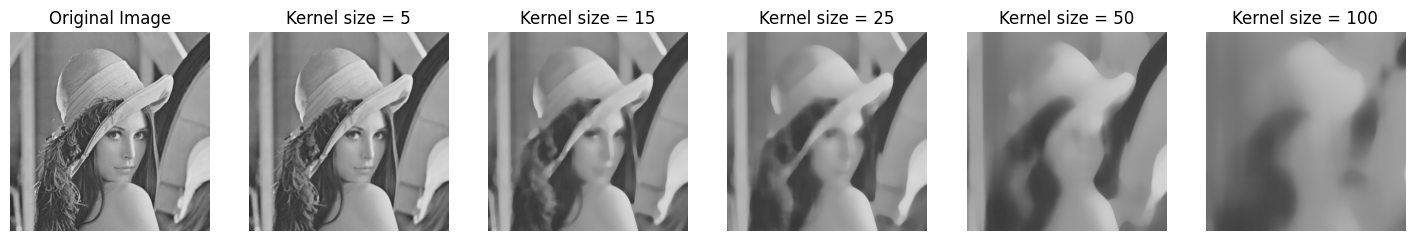

In [13]:
# Load an image using OpenCV
image = cv2.imread("./images/lenna.png", 0)

# Add salt-and-pepper noise
salt_prob = 0.2
pepper_prob = 0.2
noisy_image = salt_pepper(image, salt_prob, pepper_prob)

# Display the original and noisy images
# Your code to display images goes here!
kernel_sizes = [5, 15, 25, 50, 100]

fig, ax = plt.subplots(1, len(kernel_sizes) + 1, figsize=(18, 20))

ax[0].imshow(image, cmap="gray", vmin=0, vmax=255)
ax[0].axis("off")
ax[0].set_title("Original Image")

for i, k in enumerate(kernel_sizes):
    filtered_image = median_filter(image, k)
    ax[i+1].imshow(filtered_image, cmap="gray", vmin=0, vmax=255)
    ax[i+1].axis("off")
    ax[i+1].set_title(f"Kernel size = {k}")

fig.show()

**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

1. What is the role of the kernel size in the median filter?

2. What is the significance of padding in the median filter implementation?

3. How does the median filter perform when used with an image that has salt-and-pepper noise?

4. What advantages does the median filter offer over other filters, such as Gaussian or average filters, when handling noisy images?

# **Morphological Operations**

In this section, you will implement the fundamental morphological operators covered in class and evaluate their properties.

Basic morphological operators:

- (A). Dilation
- (B). Erosion

Derived operations:

- (C). Open
- (D). Close
- (E). Morphological gradient

To create the structuring element for these operations, you can use the function `cv2.getStructuringElement()` with the following options: cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, and cv2.MORPH_CROSS. Other structuring elements are also allowed.

---

(A). In this exercise, you will implement a **Dilation** function. Dilation is a morphological operation that expands the boundaries of objects in a binary image.

C:\Users\Eric\AppData\Local\Temp\ipykernel_11052\2803868341.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


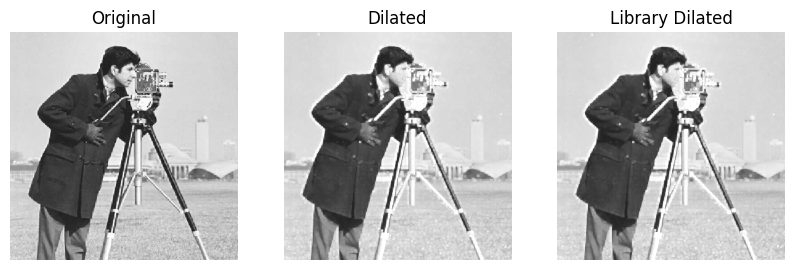

In [4]:
# Load an image
image = cv2.imread("./images/cameraman.png", 0)

# Define a kernel (e.g., 3x3 square kernel)
kernel = np.ones((3, 3))

# Function to divide the image into multiple subimages.
def sliding_window_dilatation(image, kernel):
    
    kernel_y = kernel.shape[0]
    kernel_x = kernel.shape[1]

    y, x = np.shape(image)
    cols = int(np.floor(((x - kernel_x)) + 1))
    rows = int(np.floor(((y - kernel_y)) + 1))

    subimages = np.zeros((rows, cols))
    for j in range(rows):
        j_start = j 
        j_end = j_start + kernel_y
        for i in range(cols):
            i_start= i
            i_end = i_start + kernel_x
            subimages[j, i] = int(np.max(image[j_start:j_end, i_start:i_end] * kernel))   # ← Fórmula de dilatación
            # subimages[j, i] = int(np.sum(kernel * image[j_start:j_end, i_start:i_end]))

    return subimages

def dilation(image, kernel):
    M = cv2.getStructuringElement(cv2.MORPH_RECT, kernel.shape)
    dilated_image = sliding_window_dilatation(image, M)

    return dilated_image

# Apply your dilation function
dilated_image = dilation(image, kernel)

library_dilatated = cv2.dilate(image, kernel, iterations=1)

# Display the image and dilated image
# Your code goes here!

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
# Your code goes here!
ax[1].imshow(dilated_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Dilated")
ax[1].axis("off")

ax[2].imshow(library_dilatated, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Library Dilated")
ax[2].axis("off")
fig.show()

(B). In this exercise, you will implement an **Erosion** function. Erosion is a morphological operation that shrinks the boundaries of objects in a binary image by removing pixels on object boundaries.

C:\Users\Eric\AppData\Local\Temp\ipykernel_11052\636253168.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


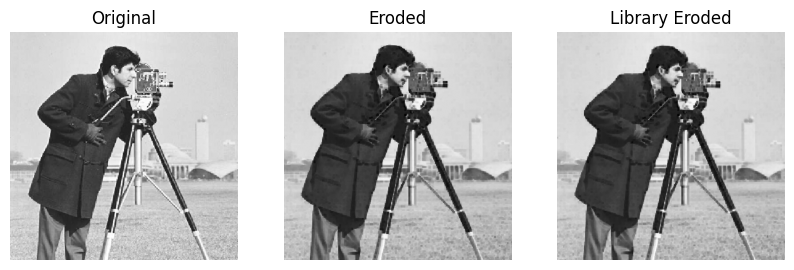

In [5]:
# Load an image
image = cv2.imread("./images/cameraman.png", 0)

# Define a kernel (e.g., 3x3 square kernel)
kernel = np.ones((3, 3))

# Function to divide the image into multiple subimages.
def sliding_window_erosion(image, kernel):
    
    kernel_y = kernel.shape[0]
    kernel_x = kernel.shape[1]

    y, x = np.shape(image)
    cols = int(np.floor(((x - kernel_x)) + 1))
    rows = int(np.floor(((y - kernel_y)) + 1))

    subimages = np.zeros((rows, cols))
    for j in range(rows):
        j_start = j 
        j_end = j_start + kernel_y
        for i in range(cols):
            i_start= i
            i_end = i_start + kernel_x
            subimages[j, i] = int(np.min(image[j_start:j_end, i_start:i_end] * kernel))   # ← Fórmula de dilatación
            # subimages[j, i] = int(np.sum(kernel * image[j_start:j_end, i_start:i_end]))

    return subimages

def erosion(image, kernel):
    M = cv2.getStructuringElement(cv2.MORPH_RECT, kernel.shape)
    dilated_image = sliding_window_erosion(image, M)

    return dilated_image

# Apply your dilation function
eroded_image = erosion(image, kernel)



# Display the image and dilated image
# Your code goes here!

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
# Your code goes here!
ax[1].imshow(eroded_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Eroded")
ax[1].axis("off")

library_eroded = cv2.erode(image, kernel, iterations=1)

ax[2].imshow(library_eroded, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Library Eroded")
ax[2].axis("off")
fig.show()

(C). In this exercise, you will implement an **Opening** function. Opening is a morphological operation that removes small objects from the foreground of a binary image while preserving the shape and size of larger objects. This is achieved by first applying erosion and then dilation using your previously implemented functions.



C:\Users\Eric\AppData\Local\Temp\ipykernel_11052\3470236803.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


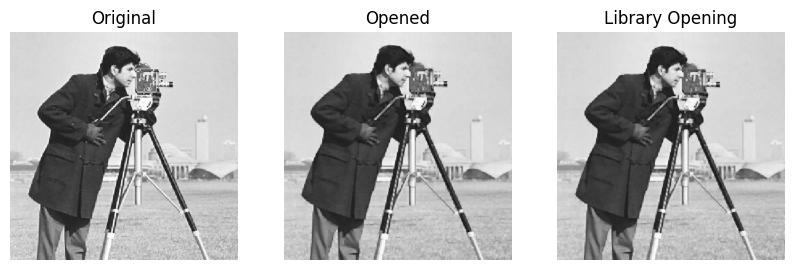

In [6]:
# Load an image
image = cv2.imread("./images/cameraman.png", 0)

# Define a kernel (e.g., 3x3 square kernel)
kernel = np.ones((3, 3))

def opening(image, kernel):

    # Your code goes here!
    eroded_image = erosion(image, kernel)
    opened_image = dilation(eroded_image, kernel)

    return opened_image

# Apply your opening function
opened_image = opening(image, kernel)

# Display the image and dilated image
# Your code goes here!

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
# Your code goes here!
ax[1].imshow(opened_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Opened")
ax[1].axis("off")

library_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

ax[2].imshow(library_opening, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Library Opening")
ax[2].axis("off")
fig.show()

(D) In this exercise, you will implement a **Closing** function. Closing is a morphological operation that fills small holes and gaps in the foreground objects of a binary image by performing dilation followed by erosion.

C:\Users\Eric\AppData\Local\Temp\ipykernel_11052\1650582960.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


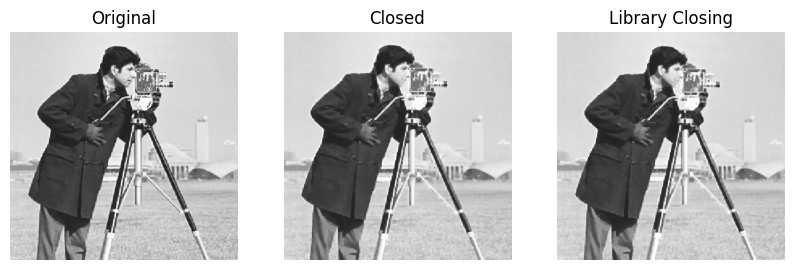

In [7]:
# Load an image
image = cv2.imread("./images/cameraman.png", 0)

# Define a kernel (e.g., 3x3 square kernel)
kernel = np.ones((3, 3))

def closing(image, kernel):

    # Your code goes here!
    dilateted_image = dilation(image, kernel)
    closed_image = erosion(dilateted_image, kernel)

    return closed_image

# Apply your closing function
closed_image = closing(image, kernel)

# Display the image and closed image
# Your code goes here!

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
# Your code goes here!
ax[1].imshow(closed_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Closed")
ax[1].axis("off")

library_closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

ax[2].imshow(library_closing, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Library Closing")
ax[2].axis("off")
fig.show()

(E). In this exercise, you will implement a **Morphological Gradient** function. Morphological gradient is a morphological operation that highlights the edges of objects in a binary image by calculating the difference between dilation and erosion of the image.

C:\Users\Eric\AppData\Local\Temp\ipykernel_11052\1866656164.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


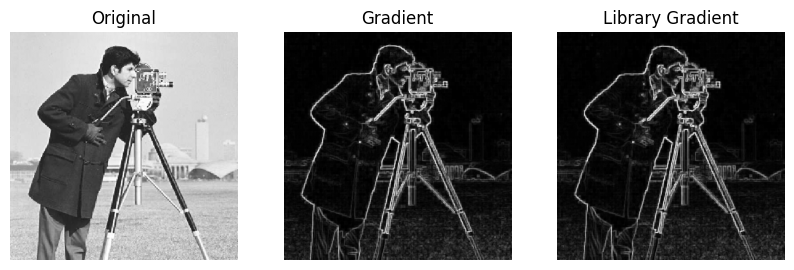

In [8]:
# Load an image
image = cv2.imread("./images/cameraman.png", 0)

# Define a kernel (e.g., 3x3 square kernel)
kernel = np.ones((3, 3))

def morphological_gradient(image, kernel):

    # Your code goes here!
    dilateted_image = dilation(image, kernel)
    eroded_image = erosion(image, kernel)
    gradient_image = dilateted_image - eroded_image
    return gradient_image

# Apply your morphological_gradient function
gradient_image = morphological_gradient(image, kernel)

# Display the image and gradient image
# Your code goes here!

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
# Your code goes here!
ax[1].imshow(gradient_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Gradient")
ax[1].axis("off")

library_gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

ax[2].imshow(library_gradient, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Library Gradient")
ax[2].axis("off")
fig.show()

**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

6. Briefly describe the following key properties of morphological operations: translation invariance, monotonicity, idempotence, duality, and closure.

7. Provide an example of the closure property by executing your code for dilation and erosion. Justify your conclusion.

8. Provide an example of the idempotence property by executing your code for erosion. Justify your conclusion.


# **Watermarking** (OPTIONAL)

In this exercise, you will implement watermarking using a combination of linear filtering, non-linear filtering, and morphological operations. The objective is to embed a watermark into an image by enhancing its structure and seamlessly blending it with the original. You will use techniques such as smoothing, edge detection, and morphological operations to improve the clarity of the watermark while adjusting its visibility through alpha blending.


**Steps**:

1. Pre-process the watermark using filters like Gaussian and/or Mean to smooth out details.

2. Enhance edges of the watermark using filters such as Laplacian and/or Sobel.

3. Refine the watermark's structure with morphological operations like dilation and/or erosion.

4. Blend the processed watermark with the original image using alpha blending via the `cv2.addWeighted()` function.

**Customization Tips**:
- Kernel sizes: Adjust kernel sizes for filters like Gaussian ((7,7)), Sobel (ksize=3), and morphological operations ((5,5)).

- Alpha blending factor: Modify the alpha value (e.g., alpha = 0.3) to control the transparency and visibility of the watermark.

- Filter combinations: Experiment by changing the order of filters and morphological operations to achieve different effects. For example, applying morphological operations earlier may lead to varied results.

In [9]:
# Import libraries
from scipy.signal import convolve2d
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Funtion to Flip the Kernel
def flipp_kernel(kernel):
    flipped_kernel = np.zeros_like(kernel)

    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            flipped_kernel[i, j] = kernel[kernel.shape[0] - 1 - i, kernel.shape[1] - 1 - j]
            
    return flipped_kernel

# Function to divide the image into multiple subimages, by stride.
def crear_stride(image, kernel, stride = 1):
    
    kernel_y = kernel.shape[0]
    kernel_x = kernel.shape[1]

    y, x = np.shape(image)
    cols = int(np.floor(((x - kernel_x) / stride) + 1))
    rows = int(np.floor(((y - kernel_y) / stride) + 1))

    subimages = np.zeros((rows, cols))
    for j in range(rows):
        j_start = j * stride
        j_end = j_start + kernel_y
        for i in range(cols):
            i_start= i * stride
            i_end = i_start + kernel_x

            subimages[j, i] = int(np.sum(kernel * image[j_start:j_end, i_start:i_end]))

    return subimages

def convolution(image, kernel, padding=0, stride=1):
    """
    Performs a convolution operation on a multi-channel image using a given kernel.

    Parameters:
      image: A 2D array representing the input image (height, width).
      kernel: A 2D array representing the convolution kernel (height, width).
      padding: An integer representing the amount of padding.
      stride: An integer representing the step size for moving the kernel.

    Returns:
      An array representing the output image after applying the convolution operation.
    """
    # Remember to flip the kernel
    # Use the np.pad() function for padding, and implement only one padding mode (e.g., constant)
    # Your code goes here!
    flipped_kernel = flipp_kernel(kernel)

    
    padded_image = np.pad(image, padding)

    imagen_filtrada = crear_stride(padded_image, flipped_kernel, stride)

    return imagen_filtrada

def gaussian_kernel(kernel_size, sigma):
    """
    Creates a Gaussian kernel.

    Parameters:
        kernel_size (int): Size of the kernel (must be odd).
        sigma (float): Standard deviation for the Gaussian distribution.

    Returns:
        np.ndarray: Gaussian kernel.
    """
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")

    # Create a grid of (x,y) coordinates
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)

    # Calculate the Gaussian function
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

    # Normalize the kernel
    kernel /= np.sum(kernel)

    return kernel

def gaussian_filter(image, kernel_size=5, sigma=1.0):
    """
    Applies a Gaussian Filter to the given image.

    Parameters:
        image (np.ndarray): Input image (2D array for grayscale, 3D for RGB).
        kernel_size (int): Size of the Gaussian kernel (must be odd).
        sigma (float): Standard deviation for the Gaussian distribution.

    Returns:
        np.ndarray: Filtered image.
    """
    # Create the Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Use your convolution function
    filtered_image = convolution(image, kernel)

    return filtered_image

# Create the Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Define the Sobel filter function
def sobel_filter(image, kernel_x = sobel_x, kernel_y = sobel_y, padding = 1, stride = 1):
  # Your code goes here!
  gradient_x = convolution(image, kernel_x, padding, stride)
  gradient_y = convolution(image, kernel_y, padding, stride)

  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

  return gradient_x, gradient_y, gradient_magnitude

Text(0.5, 1.0, 'Final Watermarked Image')

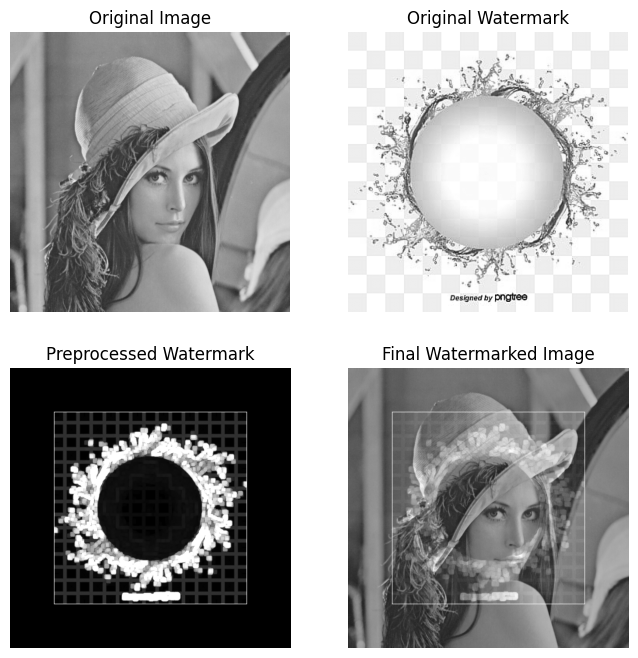

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original image and watermark
original_image = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)

watermark = cv2.imread('./images/watermark.png', cv2.IMREAD_GRAYSCALE)

# Use your already implemented functions, including those from Proyect 1.
# Your code goes here!
preprocessed_watermark = gaussian_filter(watermark)
_, _, preprocessed_watermark = sobel_filter(preprocessed_watermark)

dilation_kernel = np.array([
        [1, 1, 0, 1, 1],
        [1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1],
        [1, 1, 0, 1, 1]
])
preprocessed_watermark = dilation(preprocessed_watermark, dilation_kernel)
padding = int((original_image.shape[0] - preprocessed_watermark.shape[0]) / 2)
preprocessed_watermark = np.pad(preprocessed_watermark, padding)

# Step 6: Embed the final watermark into the original image using alpha blending
alpha = 0.2  # Transparency factor
watermarked_image = cv2.addWeighted(original_image.astype(np.float64), 1 - alpha, preprocessed_watermark, alpha, 0.0)

# Display the result
# Your code goes here!
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0][0].imshow(original_image, cmap="gray", vmin=0, vmax=255)
ax[0][0].axis("off")
ax[0][0].set_title("Original Image")

ax[0][1].imshow(watermark, cmap="gray", vmin=0, vmax=255)
ax[0][1].axis("off")
ax[0][1].set_title("Original Watermark")

ax[1][0].imshow(preprocessed_watermark, cmap="gray", vmin=0, vmax=255)
ax[1][0].axis("off")
ax[1][0].set_title("Preprocessed Watermark")

ax[1][1].imshow(watermarked_image, cmap="gray", vmin=0, vmax=255)
ax[1][1].axis("off")
ax[1][1].set_title("Final Watermarked Image")


**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

9. Describe the advantages and disadvantages of implementing watermarking using a combination of linear filtering, non-linear filtering, and morphological operations. At most use a maximum of 10 lines.

10. Choose one advantage of your implementation and illustrate it with an example from the output of your code.